# Predicting Prices of Used Cars on Craigslist

## Pre Processing the Data

Befeore we can use the data to generate a model we need to make the data able to be understood by the model. In this case we scale the data and turn all our categorical variables into dummy variables. We then seperate the data into our training data and test data.

## Create Dummy Variables

In [380]:
#Get Path
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
file ='auto_data_cleaned.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
z3 = pd.read_csv(file_name_path)
z3 = z3.reset_index()

C:\Users\Tiki\Documents\Sprinboard2\Capstone_cars
['.ipynb_checkpoints', '575_1100_compressed_data.csv', '575_1100_compressed_data.csv.zip', '62920_1026452_bundle_archive.zip', 'auto trimmed price.ipynb', 'auto1.ipynb', 'auto1_datawrangling.ipynb', 'auto2.ipynb', 'auto2_Combining Data.ipynb', 'auto3.ipynb', 'autoclean_pr_EDA_long.ipynb', 'autodata3_EDA.ipynb', 'autodata4-imputing Data.ipynb', 'autodata4-PCA.ipynb', 'autodata4.ipynb', 'auto_clean.ipynb', 'auto_clean_copy.ipynb', 'auto_clean_copy2-Copy1.ipynb', 'auto_clean_copy2.ipynb', 'auto_clean_copy2_sqrt.ipynb', 'auto_clean_copy3 State vs Region.ipynb', 'auto_clean_copy3- expand tuning.ipynb', 'auto_clean_copy4.ipynb', 'auto_clean_p1_cleandata.ipynb', 'auto_clean_p2_mergedata.ipynb', 'auto_clean_p3_impute_data.ipynb', 'auto_clean_p4_EDA.ipynb', 'CapstoneProjectSlides_example.pdf', 'correlation.png', 'correlation2.png', 'correlation_large.png', 'cylinder_drive.png', 'cylinder_drive_mileage_price.png', 'data', 'Error 2021 Predictions 

In [381]:
#shrink data where we can
categorical_columns = z3.select_dtypes(exclude=['int64', 'float']).columns.tolist()
for col in categorical_columns:
    z3[col] = z3[col].astype('category')
    
z3['cylinders'] = z3['cylinders'].astype('category')
z3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114811 entries, 0 to 114810
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   index                    114811 non-null  int64   
 1   price                    114811 non-null  int64   
 2   manufacturer             114811 non-null  category
 3   condition                114811 non-null  category
 4   cylinders                114811 non-null  category
 5   fuel                     114811 non-null  category
 6   odometer                 114811 non-null  float64 
 7   transmission             114811 non-null  category
 8   drive                    114811 non-null  category
 9   size                     114811 non-null  category
 10  paint_color              114811 non-null  category
 11  state                    114811 non-null  category
 12  age                      114811 non-null  float64 
 13  MSRP                     114811 non-null  fl

In [382]:
kw= ['Mercedes-Benz', 'Bmw', 'Audi', 'Land-Rover', 'Lexus', 'Acura', 'Jaguar']
qw= ['Alfa-Romeo', 'Tesla', 'Porsche']
z3['Lux'] = z3['manufacturer'].apply(lambda x: any([k in x for k in kw])).astype(int)
z3['sLux'] = z3['manufacturer'].apply(lambda x: any([q in x for q in qw])).astype(int)

In [383]:
z3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114811 entries, 0 to 114810
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   index                    114811 non-null  int64   
 1   price                    114811 non-null  int64   
 2   manufacturer             114811 non-null  category
 3   condition                114811 non-null  category
 4   cylinders                114811 non-null  category
 5   fuel                     114811 non-null  category
 6   odometer                 114811 non-null  float64 
 7   transmission             114811 non-null  category
 8   drive                    114811 non-null  category
 9   size                     114811 non-null  category
 10  paint_color              114811 non-null  category
 11  state                    114811 non-null  category
 12  age                      114811 non-null  float64 
 13  MSRP                     114811 non-null  fl

In [384]:
#create dummy variables
Category_Cleaned = z3['Category_Cleaned']
auto_data_dummies= pd.get_dummies(z3) #changed from z2


In [385]:
new_file = 'auto_data_dummies.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
auto_data_dummies.to_csv(new_file_name_path, index=False)

In [386]:
df =auto_data_dummies.corr(method ='pearson')
df = df[((df > 0.8) | (df < -0.8)) & (df != 1)]
non_empty_cols = [col for col in df.columns if ~df[col].isnull().all()]
empty_cols = [col for col in df.columns if df[col].isnull().all()]

## Pre Processing Feature Selection: Dropping Dummy Variables
### Eliminate variables due to intercorrelation


1) Group Intercorrelation
When we have a categorical variables and convert them into dummies we can cannot have all the dummies in the group since  the last dummy variable will be a linear combination of the other dummies. So we eliminate one variable from the group.

2) Eliminate variables where absolute correlation is greater 0.8

['price', 'odometer', 'age', 'MSRP', 'Avg_Gas_Price', 'Median Household Income', 'Avg_Mileage', 'smake', 'Lux']
['manufacturer_Tesla', 'manufacturer_Toyota', 'manufacturer_Volkswagen', 'manufacturer_Volvo', 'condition_excellent', 'condition_fair', 'condition_like new', 'condition_new', 'cylinders_3.0', 'cylinders_4.0', 'cylinders_6.0', 'cylinders_8.0', 'cylinders_10.0', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other']


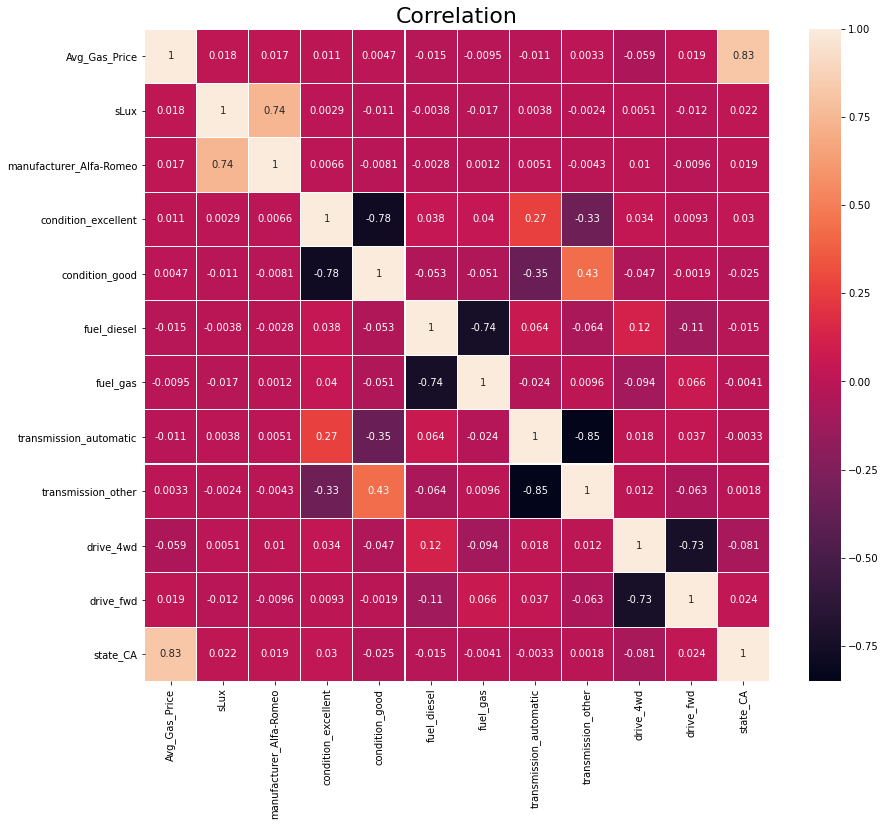

In [388]:
auto_data_dummies_small = auto_data_dummies.drop(columns= empty_cols)
plt.figure(figsize=(14,12))
sns.heatmap(auto_data_dummies_small.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);
plt.title('Correlation', fontsize=22, y=1, x= 0.5)
plt.savefig('correlation',bbox_inches='tight')

#Eliminate variables where absolute correlation is greater 0.8
auto_data_dummies2= auto_data_dummies.drop(columns= ['condition_good', 'fuel_diesel', 'transmission_other', 'drive_fwd', 'state_CA']) 

#eliminateto mass dummy intercorrelation
auto_data_dummies2= auto_data_dummies2.drop(columns= ['size_mid-size', 'paint_color_red', 'manufacturer_Infiniti', 'cylinders_5.0', 'index']) 

ac= auto_data_dummies2.columns.tolist()
print(ac[:9])
print(ac[43:60])

In [390]:
auto_data_dummies2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114811 entries, 0 to 114810
Columns: 141 entries, price to Category_Cleaned_Wagon
dtypes: float64(6), int32(2), int64(2), uint8(131)
memory usage: 22.2 MB


## Seperate Data for Train, Test, and Validate

In [391]:
#seperate X and y from each other
X = auto_data_dummies2
print(type(X))
y = auto_data_dummies2['price']

X =X.drop(columns=['price'], axis=1)

#split train, test and vals

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.25, random_state=42)


# Create val and train sets
X_train, X_test2, y_train, y_test2 = train_test_split(X_train, y_train, test_size = 3/11, random_state=42)

<class 'pandas.core.frame.DataFrame'>


## Chosing Scaler Standardization

#### Standizing Data
* We have a few methods of standardization to choose from: Robust, Minmax, Normalize and Standardize
* We use Robust if we want to minimize impact of outliers
* We use Normalize if we think the distrubtion within a variable needs to be normalized and/or has a normal distribution
* We use Standardize when we think most of the variables have similar distribution and no/few dummy variables

#### Choosing Min Max Scaler
* The data for price is and age are not a normal destribution we eliminate normalize scaler
* No large outliers as that was cleaned out already earlier we eliminate  Robust Scaler
* As we have dummy variables we can eliminate standard scaler 
* That leaves us with Min Max scaler

## Use the MinMax Scaler on Data

In [392]:
#standardize numeric variables
from sklearn.preprocessing import MinMaxScaler

#create scaler
scaler = MinMaxScaler()

#Scale numeric data1
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [393]:
df_cl_list=X_train.columns.tolist()
df3 = pd.DataFrame(X_train_mm, columns = df_cl_list)
df3 = df3.iloc[:, : 7]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62624 entries, 0 to 62623
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   odometer                 62624 non-null  float64
 1   age                      62624 non-null  float64
 2   MSRP                     62624 non-null  float64
 3   Avg_Gas_Price            62624 non-null  float64
 4   Median Household Income  62624 non-null  float64
 5   Avg_Mileage              62624 non-null  float64
 6   smake                    62624 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


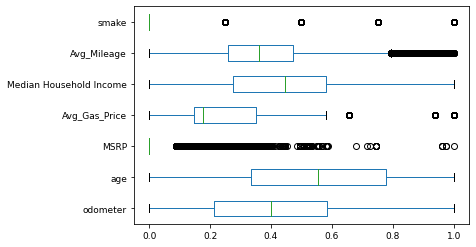

In [394]:
boxplot = df3.boxplot(grid=False, vert=False,fontsize=9)

In [395]:
from sklearn.linear_model import Ridge
#ridge = Ridge(solver='svd')
#ridge1 = Ridge(solver='svd')  
    

ridge = Ridge(solver='lsqr') #fastest solver for Ridge Regression
ridge1 = Ridge(solver='lsqr') #fastest solver for Ridge Regression 
    
    
#Instantiate and fit a ridge reg to the min_max scaled data
ridge_scaled = ridge.fit(X_train_mm, y_train)


# Instantiate and fit ridge reg classifier to the unscaled data
ridge_unscaled = ridge1.fit(X_train, y_train)


# Compute and print metrics
print('Accuracy with Min Max Scaling: {}'.format(ridge_scaled.score(X_test_mm, y_test)))
print('Accuracy without Scaling: {}'.format(ridge_unscaled.score(X_test, y_test)))


Accuracy with Min Max Scaling: 0.7099953298456982
Accuracy without Scaling: 0.23999809512167336


## Testing Models

## Comparison of the models:

We tested 10 different regression models 
* Linear Regression
* Linear Log Regression
* Ridge Regression
* Elasticnet Regression
* Decision Tree Regression
* Extra Tree Regression
* Gamma Regression
* Ridge with PCA
* Linear with PCA
* elasticnet with PCA

We Test with Two parameterrs
* Median Absolute Error: MAE
* Mean Percentage Error: MPE

Our dealer is using our prediction to decide if the asking price is lower than the predicted price he could get on Craig's list. The dealer is risk averse he does not want to take the deal if there is a high chance that the predicted price he is using is larger than the actual price. Therefore between two equally accurate models he would prefer if the  predictions under valued the car then over valued the car.

The Median Absolute Error (MAE) is useful for just getting an overall fit of the model.It is a quick and easy way to compare how well one model does versus the other. Further it is not effected by the number of parameters as say R squared. This will give us the close prediction that we want. The closer the MAE

The Median Percentage Error (MPE) tells us if our regression over estimates (positve MPE) or under estimates (negative MPE).  Between two similar models in accordance to our dealer's risk aversion we prefer a negative MPE. 

For More Information:

https://www.dataquest.io/blog/understanding-regression-error-metrics/


#### Base testing Creating MPE , MAE, and comparison charts

We are going to put some restraints on the prediction. We know that the minimum price of the car is 0. So when we take the regressions we will zero out and predictions greater than 0.

In [396]:
from sklearn.metrics import make_scorer, median_absolute_error, mean_absolute_error

#Create MAE loss function
def MedianAbsoluteError(real:np.ndarray, predicted:np.ndarray) -> np.float64:
    """
    The Mean (MAE) metric 
    :param real: The ground truth labels given in the dataset
    :param predicted: Our predictions
    :return: The Mean Absolute Error Score
    """
    predicted[predicted<0] = 0
    return median_absolute_error(real, predicted)

#Create MPE loss function
def MPE_func(real, predicted):
    """
    The Median (MAE) metric 
    :param real: The ground truth labels given in the dataset
    :param predicted: Our predictions
    :return: The Median Percentage Error Score
    """
    predicted[predicted<0] = 0
    return np.median((predicted- real)/real)

#Turn MAE and MPE into scorers
mae = make_scorer(MedianAbsoluteError, greater_is_better=False)
mpe = make_scorer(MPE_func, greater_is_better=False)

def quick_run(estimatorx, X_train, y_train, X_test, y_test, folds=5, name_g= 'default'):
    """
    Put in X and Y train and test values as well as the estimator
    ___
    Returns:  Y_ predictions and cross validated statistics
    """
 
    #fit estimate
    estimatorx.fit(X_train, y_train)
        
    # Predict using model:
    y_predict= estimatorx.predict(X_train)
    y_predict_test = estimatorx.predict(X_test)
    y_predict[y_predict<0] = 0 #The minimum price for a car is 0
    y_predict_test[y_predict_test<0] = 0 #The minimum price for a car is 0   
    
    from sklearn.model_selection import cross_val_score
    #Cross validate scores for rmsle
    #cv_scores_train = cross_val_score(estimator= estimatorx, X=X_train, y=y_train, cv=folds, scoring=rmsle_score)
    #cv_scores_test = cross_val_score(estimator= estimatorx, X=X_test, y=y_test, cv=folds, scoring=rmsle_score)
    
    cv_scores_train = cross_val_score(estimator= estimatorx, X=X_train, y=y_train, cv=folds, scoring=mpe)
    cv_scores_test = cross_val_score(estimator= estimatorx, X=X_test, y=y_test, cv=folds, scoring=mpe)
    
    #Cross validate scores for R2
    cv_mae_train = cross_val_score(estimator= estimatorx, X=X_train, y=y_train, cv=folds, scoring=mae)
    cv_mae_test = cross_val_score(estimator= estimatorx, X=X_test, y=y_test, cv=folds, scoring=mae)
    
    #get stats for cross validated scored mpe
    
    cv_scores_test_mean= cv_scores_test.mean()
    cv_scores_train_mean= cv_scores_train.mean()
    cv_scores_test_std= cv_scores_test.std()
    
    #get stats for cross validated scored mae
    #because in our scorer we used "greater"
    cv_mae_test_mean= -cv_mae_test.mean()
    cv_mae_train_mean= -cv_mae_train.mean()
    cv_mae_test_std= cv_mae_test.std()
    if name_g == 'default':
        name_reg = str(estimatorx)
    else:
        name_reg = name_g
    c= [name_reg,cv_mae_train_mean,  cv_mae_test_mean, cv_mae_test_std, cv_scores_train_mean, cv_scores_test_mean, cv_scores_test_std]
    

    print('Cross Validated Scores for regression equation: {} '.format(name_reg))
    print('Median Absolute Error: ')
    print ('Mean train score: ${:.0f} '.format(cv_mae_train_mean))
    print ('Mean test score: ${:.0f} '.format(cv_mae_test_mean))
    print ('Standard Deviation test score: ${:.0f} '.format(cv_mae_test_std))
    print('')
    print('MPE: ')
    print ('Mean train score: {:.5f} '.format(cv_scores_train_mean))
    print ('Mean test score: {:.5f} '.format(cv_scores_test_mean))
    print ('Standard Deviation test score: {:.5f} '.format(cv_scores_test_std))
    print('')
    diff = y_test -y_predict_test

    
    fig, axs = plt.subplots(2, 2, figsize=(14,5), sharey=True) #Create two sub plots sharing x and y axis
    fig.suptitle('Error in Price Prediction for {} Regression'.format(name_reg), fontsize=16, y=1 , x= 0.45)
    
    #plt scatter
    from scipy.stats import kde
    
    ax1 = plt.subplot(121)
    #sc= plt.scatter(y_test, diff, s= 1, c= cylinders_z)
    sc= plt.scatter(y_test, diff, s= 2, alpha=0.2)
    y_test_lim_up = y_test.quantile(.99)
    y_test_lim_down = y_test.quantile(.01)
    plt.xlim(y_test_lim_down, y_test_lim_up)
    plt.title('Actual Price vs Error')
    plt.ylabel('Error in $ ')
    plt.xlabel('Actual Price in $')
    plt.box(on=None)
    #cbar= plt.colorbar(sc)
    #cbar.set_label('# of cylinders', rotation=90)

    
    ax2 = plt.subplot(122)
    diff.hist(bins = 50, orientation='horizontal')
    plt.title('Histogram of Error')
    plt.ylabel('Error in $ ')
    plt.xlabel('Frequency')
    plt.box(on=None)
    plt.grid(color='white')
    plt.show()  
    

   
    return y_predict_test, c



In [397]:
def quick_grind(params, model, X_train, y_train):
    """
    put in parameter grid and estimator
    ___
    Returns:  Optimized parameters, Y_ predictions and cross validated statistics
    """
 
    #fit estimate
    model_GS = GridSearchCV(model, param_grid=params, cv=3, verbose=3, n_jobs=-1, scoring= mae)
    model_GS.fit(X_train, y_train)
    q=model_GS.best_params_
    return q, model_GS


#### Base testing 1 - Linear

Cross Validated Scores for regression equation: Linear 
Median Absolute Error: 
Mean train score: $2248 
Mean test score: $2299 
Standard Deviation test score: $27 

MPE: 
Mean train score: -0.00387 
Mean test score: -0.00104 
Standard Deviation test score: 0.00439 



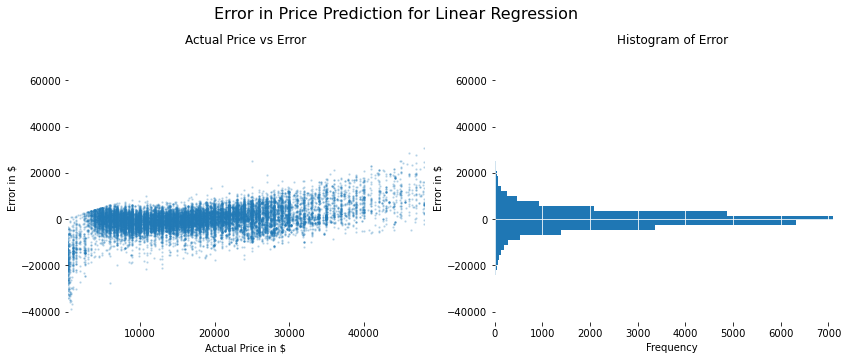

In [19]:
# Apply Linear model to training data:
linear = LinearRegression() 
y_predict_test_linear, c_linear = quick_run(linear, X_train_mm, y_train, X_test_mm, y_test, name_g= 'Linear')

#### Base testing 2 - Linear_Log

Cross Validated Scores for regression equation: Linear Log 
Median Absolute Error: 
Mean train score: $0 
Mean test score: $0 
Standard Deviation test score: $0 

MPE: 
Mean train score: 0.00579 
Mean test score: 0.00618 
Standard Deviation test score: 0.00050 



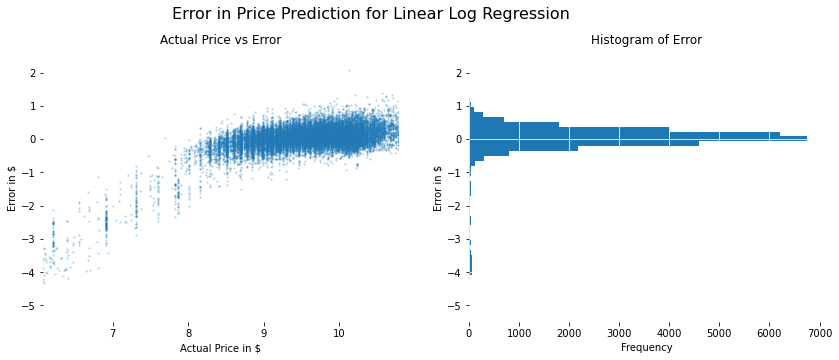

In [293]:
# Apply Linear Log model to training data:
linlog = LinearRegression() #previous optimization different study
y_train_lg = np.log(y_train)
y_test_lg = np.log(y_test)
y_predict_test_linlog, c_linlog = quick_run(linlog, X_train_mm, y_train_lg, X_test_mm, y_test_lg, name_g ='Linear Log')


#### Base testing 3 - Ridge

In [294]:
#Parameters for Ridge Hypertuning
params_ridge = {'alpha': [10, 1, 0.1, 0.01, 0.001], 'solver': ['svd', 'lsqr', 'cholesky'], 'fit_intercept': [True, False]}
model_ridge = Ridge()
q_ridge, model_ridgeft = quick_grind(params_ridge, model_ridge,  X_train_mm, y_train)
# Apply Ridge model to training data:
ridge_opt = Ridge(**model_ridgeft.best_params_)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.4min finished


Cross Validated Scores for regression equation: Ridge 
Median Absolute Error: 
Mean train score: $2245 
Mean test score: $2294 
Standard Deviation test score: $27 

MPE: 
Mean train score: -0.00447 
Mean test score: -0.00179 
Standard Deviation test score: 0.00410 



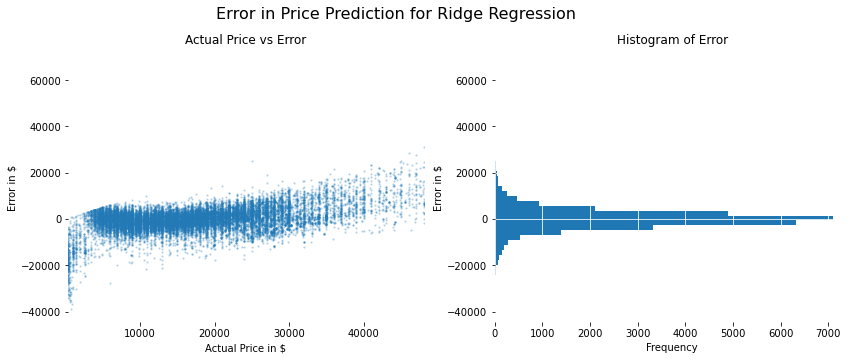

In [295]:
y_predict_test_ridge, c_ridge = quick_run(ridge_opt, X_train_mm, y_train, X_test_mm, y_test, name_g= 'Ridge')


#### Base testing 4 - Elasticnet

In [296]:
params_elastic = {'l1_ratio': [0, .1, .5, .7, .9, 1], 'alpha': [10, 1, 0.1, 0.01], 'fit_intercept': [True, False]}
model_elastic = ElasticNet()
q_elastic, model_ft = quick_grind(params_elastic, model_elastic,  X_train_mm, y_train)
# Apply Elastic Net hyper tuned parameters to training data:
elastic_opt = ElasticNet(**model_ft.best_params_)
print(q_elastic)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 10.3min finished


{'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.9}


Cross Validated Scores for regression equation: ElasticNet 
Median Absolute Error: 
Mean train score: $2236 
Mean test score: $2289 
Standard Deviation test score: $27 

MPE: 
Mean train score: -0.00588 
Mean test score: -0.00303 
Standard Deviation test score: 0.00364 



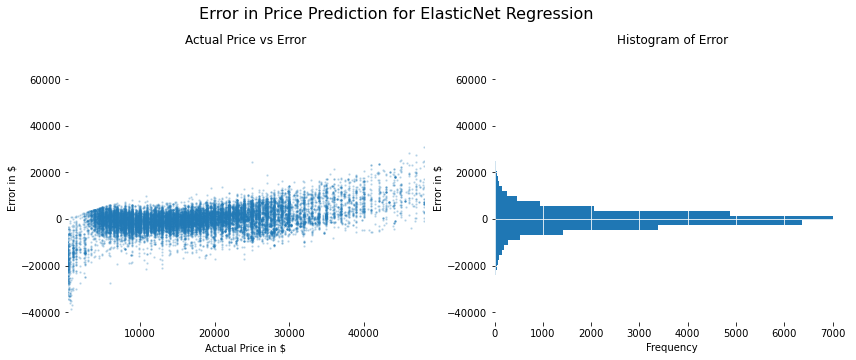

In [297]:
y_predict_test_elastic, c_elastic = quick_run(elastic_opt, X_train_mm, y_train, X_test_mm, y_test,  name_g= 'ElasticNet')


#### Base Testing 5- Gamma Regression

In [298]:
from sklearn.linear_model import GammaRegressor
params_gamma = {'alpha': [1, 0.5, 0.3, 0.1, 0.05, 0], 'fit_intercept': [True, False], 'warm_start':[True, False] }
model_gamma = GammaRegressor(max_iter=200)
q_gamma, model_ft = quick_grind(params_gamma, model_gamma,  X_train_mm, y_train)
print(q_gamma)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   43.7s finished


{'alpha': 0, 'fit_intercept': False, 'warm_start': True}


C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

Cross Validated Scores for regression equation: Gamma 
Median Absolute Error: 
Mean train score: $2203 
Mean test score: $2216 
Standard Deviation test score: $38 

MPE: 
Mean train score: -0.01140 
Mean test score: -0.01243 
Standard Deviation test score: 0.00594 



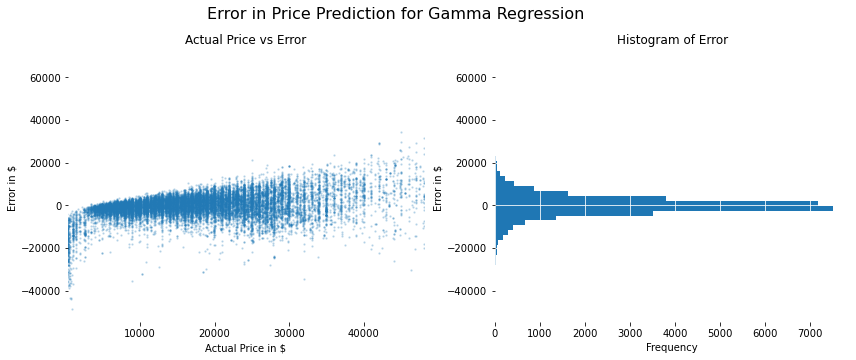

In [299]:
# Apply gamma hyper tuned parameters to training data:
gamma_opt = GammaRegressor(**model_ft.best_params_)
y_predict_test_gr, c_gr = quick_run(gamma_opt, X_train_mm, y_train, X_test_mm, y_test, name_g= 'Gamma')

#### Base Testing 6- Extra Tree Regression

In [20]:
from sklearn.tree import ExtraTreeRegressor
model_ext = ExtraTreeRegressor()
#Parameter grid search extra tree
params_ext= { 'min_samples_leaf': range(3,38,5), 'min_samples_split': range(15,36,10), 'max_depth': [25, 30]}                           


In [21]:

q_ext, model_ft_ext = quick_grind(params_ext, model_ext,  X_train_mm, y_train)
print(q_ext)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:  1.3min finished


{'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 15}


Cross Validated Scores for regression equation: Extra Tree 
Median Absolute Error: 
Mean train score: $1540 
Mean test score: $1848 
Standard Deviation test score: $23 

MPE: 
Mean train score: 0.00000 
Mean test score: 0.00055 
Standard Deviation test score: 0.00076 



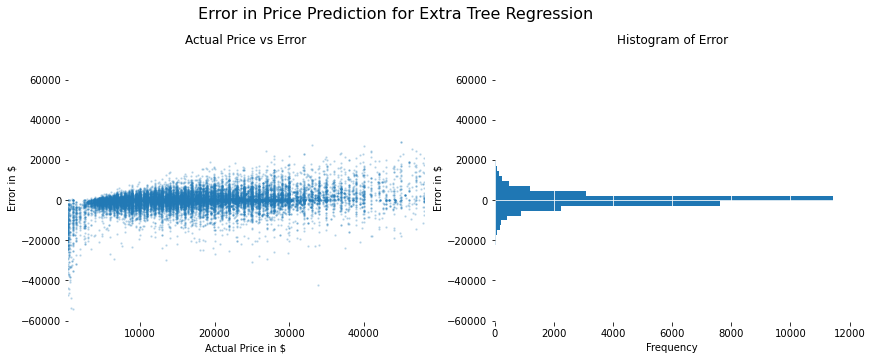

In [22]:
#Apply Hyperparameters to training data
ext_opt = ExtraTreeRegressor(**model_ft_ext.best_params_)

y_predict_test_ext, c_ext = quick_run(ext_opt, X_train_mm, y_train, X_test_mm, y_test,  name_g= 'Extra Tree')


In [303]:
from sklearn.ensemble import RandomForestRegressor
model_randf = RandomForestRegressor()
#Parameter grid search extra tree
params_randf= {'min_samples_leaf': range(5,21,5), 'min_samples_split': range(15,36,10), 'max_depth': [20, 25, 30]}                           

q_randf, model_ft_rf = quick_grind(params_randf, model_randf,  X_train_mm, y_train)
print(q_randf)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 38.3min finished


{'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 15}


In [304]:
#Apply Hyperparameters to training data
randf_opt =  RandomForestRegressor(**model_ft_rf.best_params_)
#randf_opt =  RandomForestRegressor(min_samples_split=5, min_samples_leaf=15)

Cross Validated Scores for regression equation: Random Forest 
Median Absolute Error: 
Mean train score: $1381 
Mean test score: $1641 
Standard Deviation test score: $32 

MPE: 
Mean train score: -0.00105 
Mean test score: -0.00095 
Standard Deviation test score: 0.00156 



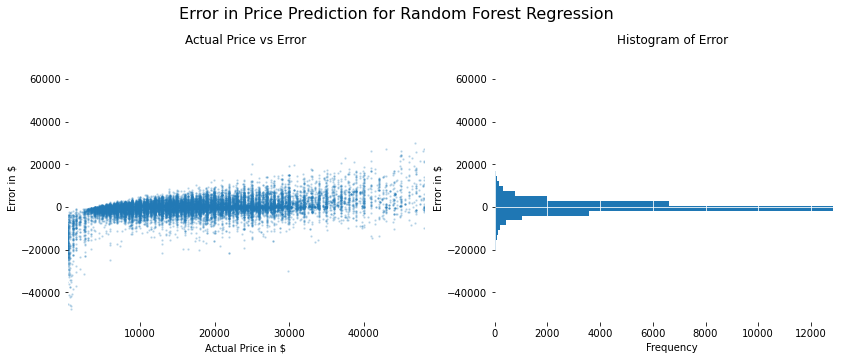

In [305]:

y_predict_test_randf, c_randf = quick_run(randf_opt, X_train_mm, y_train, X_test_mm, y_test,  name_g= 'Random Forest')

#### Base testing 8 - Linear PCA

Cross Validated Scores for regression equation: PCA Linear 
Median Absolute Error: 
Mean train score: $2752 
Mean test score: $2755 
Standard Deviation test score: $15 

MPE: 
Mean train score: -0.01540 
Mean test score: -0.01441 
Standard Deviation test score: 0.00496 



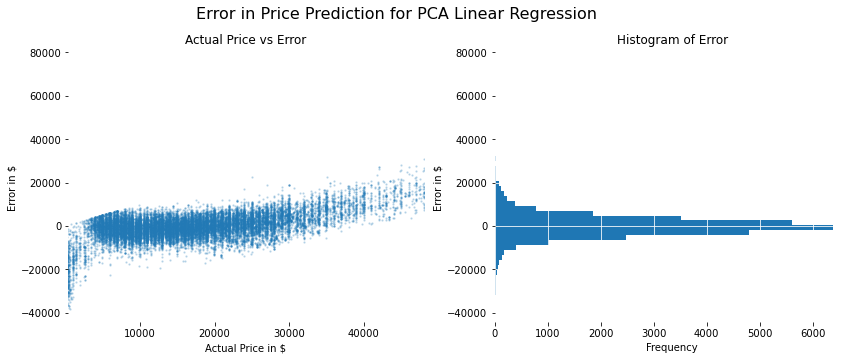

In [306]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA() 
linear_dg= LinearRegression()
pipe_linear = Pipeline(steps=[('pca', pca), ('linear', linear_dg)])
param_grid = {'pca__n_components':  list(range(1,20,2)) ,}
linear_pca = GridSearchCV(pipe_linear, param_grid, cv=5, scoring= mae)
linear_pca.fit(X_train_mm, y_train)
pipe_linear = linear_pca.best_estimator_
y_predict_test_pca_lin, c_pca_lin = quick_run(pipe_linear, X_train_mm, y_train, X_test_mm, y_test, name_g= 'PCA Linear')

#### Base testing 9 - Elasticnet PCA

In [307]:
elastic_dg= ElasticNet( selection= 'random' )
pipe_elastic = Pipeline(steps=[('pca', pca), ('elastic', elastic_dg)])

param_grid = {'pca__n_components':  list(range(1,20,3)) , 'elastic__l1_ratio': [0, .5, .1], 
              'elastic__alpha': [10, 1, 0.1]}


In [308]:
elastic_pca = GridSearchCV(pipe_elastic, param_grid, cv=5, scoring= mae)
elastic_pca.fit(X_train_mm, y_train)
pipe_p = elastic_pca.best_estimator_

C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2312505060825.8066, tolerance: 471089346.7142323
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2322277317173.3105, tolerance: 473167745.1882402
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2306021294209.2827, tolerance: 469761811.13914907
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2292800414693.297, tolerance: 469761811.13914907
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2321688400490.883, tolerance: 475642385.6564854
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2320832683859.004, tolerance: 475536485.4838465
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208

C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2020734887906.9822, tolerance: 475642385.6564854
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2019143773360.9617, tolerance: 475536485.4838465
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1971395856670.8838, tolerance: 471089346.7142323
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1547059787145.9387, tolerance: 475536485.4838465
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460275512378.8103, tolerance: 471089346.7142323
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1464940583802.3125, tolerance: 473167745.1882402
  positive)
C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

Cross Validated Scores for regression equation: PCA Elastic 
Median Absolute Error: 
Mean train score: $2748 
Mean test score: $2790 
Standard Deviation test score: $26 

MPE: 
Mean train score: -0.03857 
Mean test score: -0.03585 
Standard Deviation test score: 0.00509 



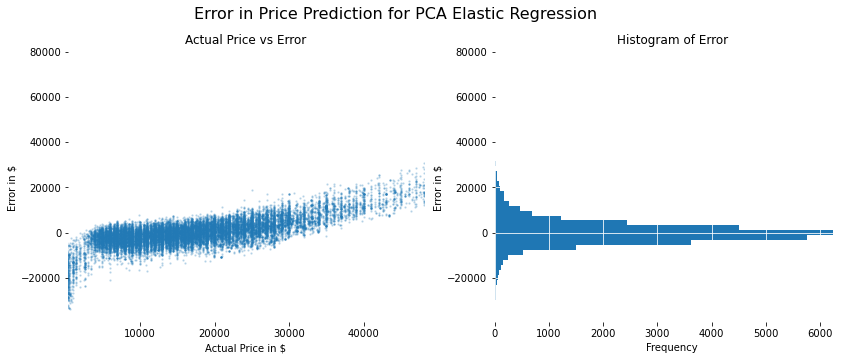

In [309]:

y_predict_test_pca_elastic, c_pca_elastic = quick_run(pipe_p, X_train_mm, y_train, X_test_mm, y_test, name_g= 'PCA Elastic')


### Comparing Models

#### Comparing Models table

In [310]:
score_columns= ['Algorithm', 'MAE Train', 'MAE Test',  'MAE Test std', 'MPE Train', 'MPE Test',  'MPE Test std']
c_data =[c_linear, c_ridge, c_elastic, c_randf, c_ext, c_gr, c_pca_lin, c_pca_elastic]
convert_dict = {'MAE Train': int, 'MAE Test': int} 
score_tab = pd.DataFrame(c_data, columns= score_columns )
score_tab = score_tab.astype(convert_dict) 
pd.options.display.float_format = '{:.3f}'.format



new_file = 'model_comparison.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
score_tab.to_csv(new_file_name_path, index=False)

score_tab.sort_values('MAE Test')

,Algorithm,MAE Train,MAE Test,MAE Test std,MPE Train,MPE Test,MPE Test std
3,Random Forest,1380,1641,31.602,-0.001,-0.001,0.002
4,Extra Tree,1540,1889,20.887,0.000,0.000,0.001
5,Gamma,2203,2215,38.075,-0.011,-0.012,0.006
2,ElasticNet,2235,2289,27.372,-0.006,-0.003,0.004
1,Ridge,2244,2294,26.612,-0.004,-0.002,0.004
0,Linear,2247,2299,25.976,-0.004,-0.001,0.004
6,PCA Linear,2752,2754,15.473,-0.015,-0.014,0.005
7,PCA Elastic,2748,2790,25.902,-0.039,-0.036,0.005


#### Comparing Models Graph

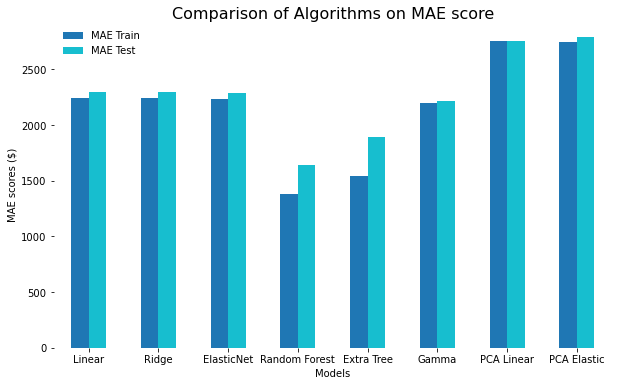

In [311]:
from matplotlib import cm
score_tab_MAE= score_tab[['Algorithm','MAE Train', 'MAE Test']].set_index('Algorithm')
cmap = cm.get_cmap('tab10') 

ax=score_tab_MAE.plot.bar(rot=0, figsize=(10,6), cmap=cmap )

plt.title('Comparison of Algorithms on MAE score', fontsize=16, pad=0.1)
plt.legend(frameon= False)
plt.box(on=None)
plt.xlabel('Models',fontsize=10)
plt.ylabel ('MAE scores ($)',fontsize=10)
plt.savefig("Figx_ModelComparison.png")


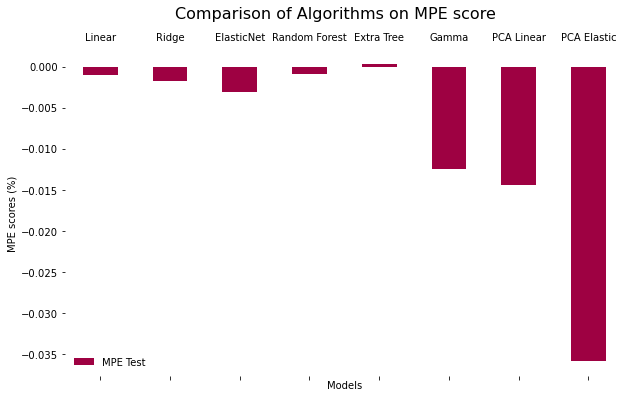

In [312]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

score_tab_MPE= score_tab[['Algorithm','MPE Test']].set_index('Algorithm')



ax=score_tab_MPE.plot.bar(rot=0, figsize=(10,6), cmap=cmap )
ax.tick_params(labelbottom=False,labeltop=True)
plt.suptitle('Comparison of Algorithms on MPE score', fontsize=16,)

plt.xlabel('Models',fontsize=10)
plt.ylabel ('MPE scores (%)',fontsize=10)
plt.legend(frameon= False)
plt.box(on=None)
plt.savefig("Figx_ModelComparison_MPE.png")


#### Winner Algorithm: Random Forest Regression

As we look at the 9 models we find a two overall trends:
* All of these models over estimate versus under estimate (MPE is negative).
* Models error is correlated to explanotry variable (price).

Within these nine models we can group them into PCA, Linear Type and Ensemble:
* Models with the PCA have hive higher MAE and the absolute value of their MPE is larger than the other models so we eliminate
* 3 Linear Type regressions (Elastic, Linear and Ridge) have very similar MAE results around ()
* Of the linear type of regressions Gamma had the best results. That makes sense as the explanatory variable (price) does not have a normal distribution but skews left.
* Ensumble methods (Random Forest and Extra Tree) have 
    * The best MAE and MPE scores
    * The least price to error correlation 

Within Ensemble Methods:
* Random Forest Regression  MAE Test results are better than Extra Tree train scores
* Random Forest Regression  MPE Test results are within Exra Tree MPE test results + strandard deviation
* We therefore pick Randon Forest Regression.


## Optimizing Random Forest 

Now that we know that Random Forest looks like the best model we use a grid search to find the best parameter. 
We look in particular at the minimum samples per leaf, maximum number of feat. and minimum number of splits.

### Hyperparameter Tuning: Random Forest

In [313]:
from sklearn.ensemble import RandomForestRegressor
model_randf = RandomForestRegressor(n_estimators=150, max_depth=30)
#Parameter grid search extra tree
params_randf= {'min_samples_leaf': range(3,11,2), 'min_samples_split': range(15,36,10), 
            'max_features': range(50,201,25)
              }                           


model_opt_rf = GridSearchCV(model_randf, param_grid=params_randf, cv=5, verbose=4, n_jobs=-1, scoring= mae)
model_opt_rf.fit(X_train_mm, y_train)
q_opt_rf=model_opt_rf.best_params_
print(q_opt_rf)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 114.4min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 132.8min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 132.9min finished


{'max_features': 125, 'min_samples_leaf': 3, 'min_samples_split': 15}


In [25]:
from sklearn.ensemble import RandomForestRegressor
model_randf = RandomForestRegressor(n_estimators=150, max_depth=30, min_samples_leaf=3)
#Parameter grid search extra tree
params_randf= {'min_samples_split': range(15,36,10), 
            'max_features': range(50,201,20), 'min_samples_leaf': [3]
              }                           


model_opt_rf = GridSearchCV(model_randf, param_grid=params_randf, cv=5, verbose=4, n_jobs=-1, scoring= mae)
model_opt_rf.fit(X_train_mm, y_train)
q_opt_rf=model_opt_rf.best_params_
print(q_opt_rf)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 44.9min finished


{'max_features': 110, 'min_samples_leaf': 3, 'min_samples_split': 15}


Cross Validated Scores for regression equation: Random Forest Optimized 
Median Absolute Error: 
Mean train score: $1285 
Mean test score: $1541 
Standard Deviation test score: $21 

MPE: 
Mean train score: -0.00027 
Mean test score: 0.00056 
Standard Deviation test score: 0.00289 



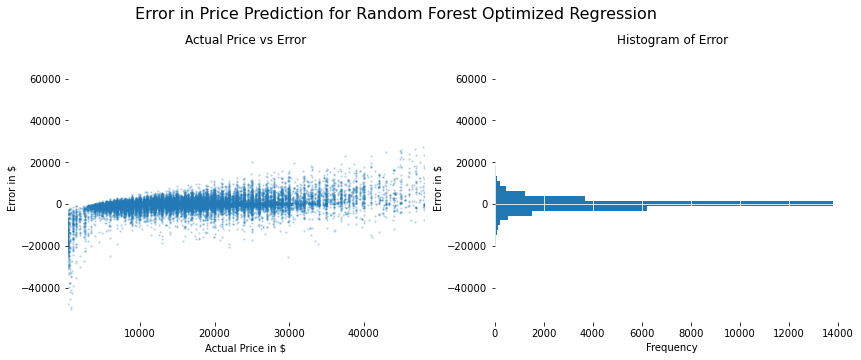

In [398]:
randf_opt2 =  RandomForestRegressor(**model_opt_rf.best_params_, n_estimators=150, max_depth=30)
y_predict_test_randf_do, c_randf = quick_run(randf_opt2, X_train_mm, y_train, X_test_mm, y_test,  name_g= 'Random Forest Optimized')

In [400]:
error_test= y_predict_test_randf_do- y_test
y_predict_train= randf_opt2.predict(X_train_mm)
error_train= y_predict_train- y_train



### Feature Importance Random Forest Regression

#### Create Feature Importance Tables

In [27]:
#Calculate feature importance train set given the first regression
feature_names = X_train.columns 
fimpotance_train = pd.DataFrame(randf_opt2.feature_importances_, columns=['Mean Feature Importance'], index=feature_names)
from sklearn.inspection import permutation_importance

In [28]:
from sklearn.inspection import permutation_importance
#Calculate feature importance for five splits using the train set
result_train = permutation_importance(randf_opt2, X_train_mm, y_train, n_repeats=5, n_jobs=-1, random_state=42)

#Create data frame of feature importances for the five folds given the train set
fimpotance_train2 = pd.DataFrame(result_train.importances.T, columns=feature_names)
fimpotance_train2

,odometer,age,MSRP,Avg_Gas_Price,Median Household Income,Avg_Mileage,smake,Lux,sLux,manufacturer_Acura,...,Category_Cleaned_Convertible,Category_Cleaned_Coupe,Category_Cleaned_Hatchback,Category_Cleaned_Pickup,Category_Cleaned_SUV,Category_Cleaned_Sedan,Category_Cleaned_Suv,Category_Cleaned_Unlisted,Category_Cleaned_Van/Minivan,Category_Cleaned_Wagon
0,0.369879,0.157032,0.010076,0.012879,0.010551,0.044308,0.368157,0.029896,0.000034,0.000096,...,0.001234,0.002249,0.001578,0.085757,0.004452,0.019383,0.002647,0.002843,0.003551,0.000079
1,0.366100,0.156801,0.009973,0.012883,0.010535,0.044123,0.372067,0.028330,0.000035,0.000101,...,0.001215,0.002086,0.001692,0.085268,0.004010,0.019513,0.002473,0.002910,0.003701,0.000083
2,0.370133,0.156846,0.009835,0.012975,0.010239,0.044066,0.367437,0.028049,0.000033,0.000096,...,0.001222,0.002159,0.001693,0.082923,0.004214,0.019909,0.002509,0.002826,0.003631,0.000077
3,0.369341,0.156025,0.009991,0.012796,0.010415,0.043860,0.369139,0.028632,0.000034,0.000099,...,0.001241,0.002155,0.001736,0.084603,0.004360,0.020438,0.002522,0.002703,0.003647,0.000078
4,0.368436,0.156826,0.009861,0.012849,0.010377,0.044307,0.365152,0.028022,0.000033,0.000096,...,0.001245,0.002243,0.001856,0.083728,0.004622,0.019471,0.002658,0.002768,0.003476,0.000084


In [29]:
#Calculate feature importance for five splits using the test set
from sklearn.inspection import permutation_importance
result_test = permutation_importance(randf_opt2, X_test_mm, y_test, n_repeats=5, random_state=42, n_jobs=-1)

#Create data frame of feature importances for the five folds given the test set
fimpotance_test2 = pd.DataFrame(result_test.importances.T, columns=feature_names)
fimpotance_test2

,odometer,age,MSRP,Avg_Gas_Price,Median Household Income,Avg_Mileage,smake,Lux,sLux,manufacturer_Acura,...,Category_Cleaned_Convertible,Category_Cleaned_Coupe,Category_Cleaned_Hatchback,Category_Cleaned_Pickup,Category_Cleaned_SUV,Category_Cleaned_Sedan,Category_Cleaned_Suv,Category_Cleaned_Unlisted,Category_Cleaned_Van/Minivan,Category_Cleaned_Wagon
0,0.306537,0.118455,0.008496,0.004425,0.002680,0.025575,0.323067,0.024374,0.000165,0.000061,...,0.001168,0.001297,0.001015,0.070818,0.002819,0.015629,0.001375,0.001812,0.002784,0.000062
1,0.308177,0.119518,0.008328,0.004733,0.003007,0.025438,0.333319,0.023965,0.000166,0.000061,...,0.001229,0.001267,0.001105,0.071361,0.003232,0.014624,0.001289,0.001821,0.002982,0.000050
2,0.311369,0.116850,0.008823,0.004506,0.002683,0.025217,0.327688,0.023279,0.000165,0.000064,...,0.001264,0.001222,0.001107,0.069589,0.003315,0.014177,0.001491,0.001582,0.002517,0.000056
3,0.309533,0.118048,0.008872,0.004435,0.002934,0.025599,0.329182,0.024457,0.000165,0.000057,...,0.001197,0.000925,0.001095,0.069117,0.003288,0.014514,0.001368,0.001511,0.002526,0.000041
4,0.308585,0.121907,0.008571,0.004442,0.003089,0.026563,0.334403,0.023389,0.000165,0.000062,...,0.001204,0.001108,0.001034,0.068744,0.002835,0.013408,0.001486,0.001612,0.002970,0.000043


#### Visualizing Feature Importance

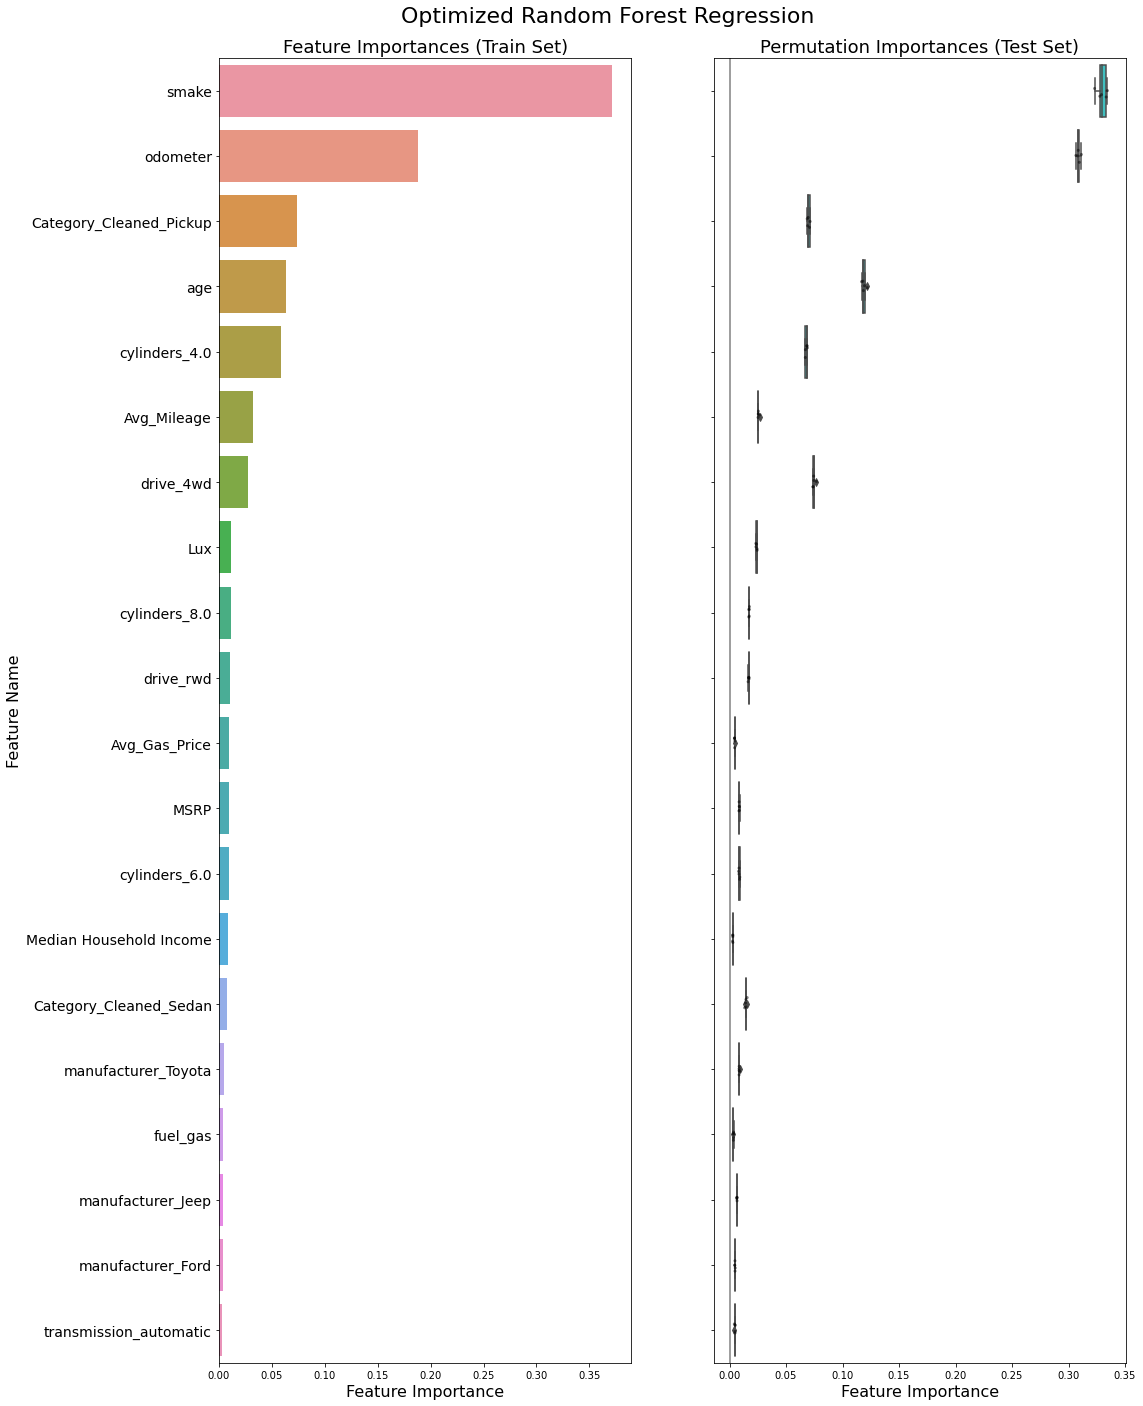

In [234]:
z_names_30 = fimpotance_train.sort_values(by= ['Mean Feature Importance'], ascending= False).head(20).index.tolist()
fimpotance_test2_f30 = fimpotance_test2[z_names_30]
z30 = fimpotance_train.sort_values(by= ['Mean Feature Importance'], ascending= False).head(20)
z30=z30.reset_index().rename(columns={"index": "Feature Name"})


fig, axs = plt.subplots(1, 2, figsize=(18, 24), sharey=True, sharex=True)
fig.suptitle('Optimized Random Forest Regression', fontsize=22, y=0.91, x= 0.5)
ax = plt.subplot(121)
sns.barplot(x='Mean Feature Importance',  y="Feature Name",  data=z30)
plt.title("Feature Importances (Train Set)", fontsize=18)
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.yticks(fontsize=14)

plt.subplot(122)



#graphing coefficent and importance
#sns.swarmplot(data=coefs2, orient='h', color='k', alpha=0.5, size=3)
sns.stripplot(data=fimpotance_test2_f30, orient='h', color='k', alpha=0.5, size=3)
sns.boxplot(data=fimpotance_test2_f30, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.title("Permutation Importances (Test Set)", fontsize=18)
plt.xlabel('Feature Importance', fontsize=16)
plt.subplots_adjust(left=.2)

for ax in fig.get_axes():
    ax.label_outer()

plt.savefig("Feature Importance")


fimpotance_train2_f30 = fimpotance_train2[z_names_30]

fig, axs = plt.subplots(1, 2, figsize=(18, 24), sharey=True, sharex=True)
fig.suptitle('Optimized Random Forest Regression', fontsize=14, y=0.9, x= 0.6)
ax = plt.subplot(121)
sns.barplot(x='Mean Feature Importance',  y="Feature Name",  data=z30)
plt.title("Feature Importances (Train Set)")


plt.subplot(122)



#graphing coefficent and importance
#sns.swarmplot(data=coefs2, orient='h', color='k', alpha=0.5, size=3)
sns.stripplot(data=fimpotance_train2_f30, orient='h', color='k', alpha=0.5, size=3)
sns.boxplot(data=fimpotance_train2_f30, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.title("Permutation Importances (Train Set)")
plt.xlabel('Feature importance')
plt.subplots_adjust(left=.2)

for ax in fig.get_axes():
    ax.label_outer()
#fig.title('Ridge model no PCA Coefficents')

### Final Test Data (Validate)

#### Acquiring Test Data

In [40]:
# Create the list of file names: filenames
file ='auto_data_cleaned.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
df_fin = pd.read_csv(file_name_path)
df_fin = df_fin.reset_index()



df_fin.info()
df_fin.smake.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114811 entries, 0 to 114810
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    114811 non-null  int64  
 1   price                    114811 non-null  int64  
 2   manufacturer             114811 non-null  object 
 3   condition                114811 non-null  object 
 4   cylinders                114811 non-null  float64
 5   fuel                     114811 non-null  object 
 6   odometer                 114811 non-null  float64
 7   transmission             114811 non-null  object 
 8   drive                    114811 non-null  object 
 9   size                     114811 non-null  object 
 10  paint_color              114811 non-null  object 
 11  state                    114811 non-null  object 
 12  age                      114811 non-null  float64
 13  MSRP                     114811 non-null  float64
 14  Avg_

0    97251
1     8051
2     7722
3     1158
4      629
Name: smake, dtype: int64

#### Pre Processing

In [41]:
#Get dummies
df_fin['cylinders'] = df_fin['cylinders'].astype('category')


kw= ['Mercedes-Benz', 'Bmw', 'Audi', 'Land-Rover', 'Lexus', 'Acura', 'Jaguar']
qw= ['Alfa-Romeo', 'Tesla', 'Porsche']
df_fin['Lux'] = df_fin['manufacturer'].apply(lambda x: any([k in x for k in kw])).astype(int)
df_fin['sLux'] = df_fin['manufacturer'].apply(lambda x: any([q in x for q in qw])).astype(int)
df_fin= pd.get_dummies(df_fin) 

#Correlation is not a big deal for random Forest Regression so we keep them in

#seperate X and y from each other
y = df_fin['price']
X =df_fin.drop(columns=['price', 'index'], axis=1)


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.25, random_state=42)


# Create val and train sets
X_train3, X_test2, y_train3, y_test2 = train_test_split(X_train, y_train, test_size = 3/11, random_state=42)

#Combine Train and Validation data together to get larger data set
X_train2 = X_train3.append(X_test, ignore_index=True)
y_train2 = y_train3.append(y_test, ignore_index=True)

#standardize numeric variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #create scaler

#Scale numeric data
X_train2_mm = scaler.fit_transform(X_train2)
X_test2_mm = scaler.transform(X_test2)
X_test2_mm.shape

(23484, 149)

#### Prediction

In [42]:
#Use previous Hypertuned Spec
#randf_opt3 = RandomForestRegressor(**model_opt_rf.best_params)
randf_opt3 =  RandomForestRegressor(**model_opt_rf.best_params_, n_estimators=150, max_depth=30)


Cross Validated Scores for regression equation: Random Forest All Data 
Median Absolute Error: 
Mean train score: $1143 
Mean test score: $1630 
Standard Deviation test score: $26 

MPE: 
Mean train score: 0.00070 
Mean test score: -0.00224 
Standard Deviation test score: 0.00269 



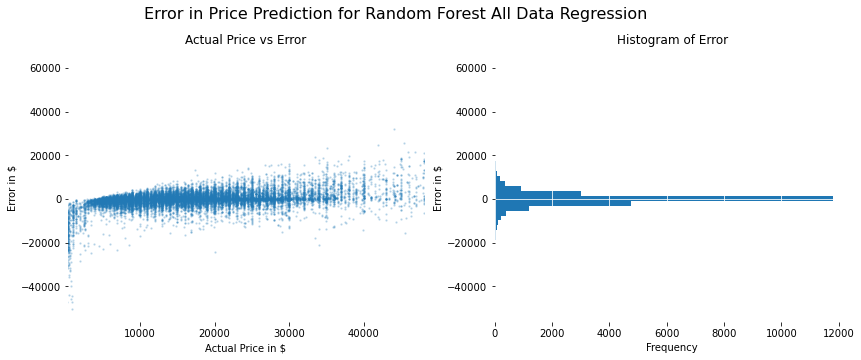

In [43]:


y_predict_test_randf, c_randf = quick_run(randf_opt3, X_train2_mm, y_train2, X_test2_mm, y_test2,  name_g= 'Random Forest All Data')


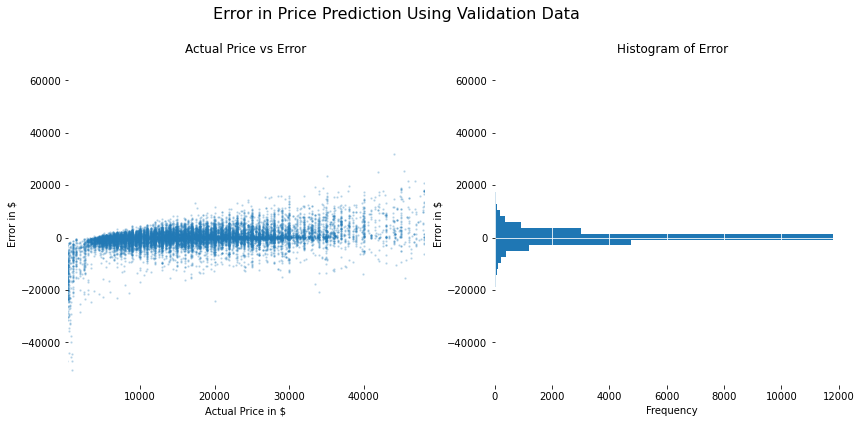

In [312]:

diff = y_test2 -y_predict_test_randf
fig, axs = plt.subplots(2, 2, figsize=(14,6), sharey=True) #Create two sub plots sharing x and y axis
fig.suptitle('Error in Price Prediction Using Validation Data', fontsize=16, y=1 , x= 0.45)
    
    #plt scatter
from scipy.stats import kde
    
ax1 = plt.subplot(121)
    #sc= plt.scatter(y_test, diff, s= 1, c= cylinders_z)
sc= plt.scatter(y_test2, diff, s= 2, alpha=0.2)
y_test_lim_up = y_test2.quantile(.99)
y_test_lim_down =  y_test2.quantile(.01)
plt.xlim(y_test_lim_down, y_test_lim_up)
plt.title('Actual Price vs Error')
plt.ylabel('Error in $ ')
plt.xlabel('Actual Price in $')
plt.box(on=None)
#cbar= plt.colorbar(sc)
#cbar.set_label('# of cylinders', rotation=90)

    
ax2 = plt.subplot(122)
diff.hist(bins = 50, orientation='horizontal')
plt.title('Histogram of Error')
plt.ylabel('Error in $ ')
plt.xlabel('Frequency')
plt.box(on=None)
plt.grid(color='white')
plt.savefig('figures/Validation')

<AxesSubplot:ylabel='Count'>

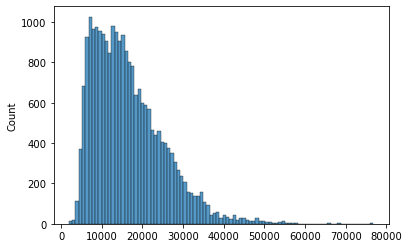

In [55]:
sns.histplot(y_predict_test_randf)

In [465]:
error_validation = y_predict_test_randf-y_test2
error_test= y_predict_test_randf_do- y_test
error_train= y_predict_train- y_train
ap = [0.2, 0.8, 0.849] 
Error_table = {"Actual Price Train": y_train.describe(percentiles= ap),
               "Train Error": error_train.describe(percentiles= ap),
               "Test Error":  error_test.describe(percentiles= ap),
               "Validation Error": error_validation.describe(percentiles= ap)            
              } 
df_Error = pd.concat(Error_table, axis = 1).reset_index()
df_Error= df_Error.rename(columns={"index": "Summary Statistics"})
new_file = 'error_validation.csv'
new_file_name_path = os.path.join(basepath,'data', new_file)
df_Error.to_csv(new_file_name_path, index=False)
pd.options.display.float_format = '{:,.0f}'.format
df_Error.set_index('Summary Statistics')

,Actual Price Train,Train Error,Test Error,Validation Error
Summary Statistics,,,,
count,"62,624","62,624","28,703","23,484"
mean,"16,544",-1,23,9
std,"9,717","2,973","4,087","3,959"
min,102,"-71,454","-67,773","-62,571"
20%,"8,173","-1,193","-1,660","-1,512"
50%,"14,990",-1,5,-7
80%,"23,900","1,139","1,595","1,465"
84.9%,"25,995","1,540","2,147","1,994"
max,"95,000","40,335","50,385","50,512"


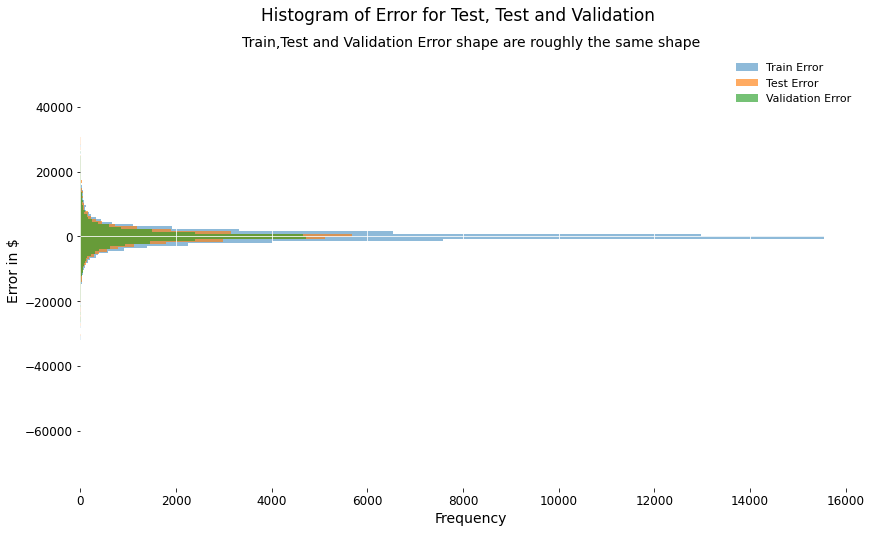

In [450]:
bins = 150
plt.figure(figsize=(14,8))
plt.hist(error_train, bins, alpha=0.5, label='Train Error', orientation='horizontal')
plt.hist(error_test, bins, alpha=0.65, label='Test Error', orientation='horizontal')
plt.hist(error_validation, bins, alpha=0.65, label='Validation Error', orientation='horizontal')
plt.suptitle('Histogram of Error for Test, Test and Validation', fontsize=17, y=0.96)
plt.title('Train,Test and Validation Error shape are roughly the same shape and average value', fontsize=14)
plt.ylabel('Error in $', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=11, frameon=False)
plt.box(on=None)
plt.grid(color='white')
plt.savefig("Error Distribution For Train, Test and Validation")

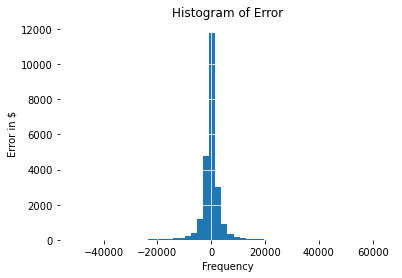

In [301]:
diff.hist(bins = 50)
plt.title('Histogram of Error')
plt.ylabel('Error in $ ')
plt.xlabel('Frequency')
plt.box(on=None)
plt.grid(color='white')


### Is Our Model Good ?

Is at least 95% of the data withing the prediction +/- 5000

### Prediction


In [368]:
# Data From Craiglist January 2021
file ='ravi.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
df_2021 = pd.read_csv(file_name_path)
df_2021 = df_2021.reset_index()


#seperate X and y from each other
y_2021_actual = df_2021['price']
X_2021 =df_2021.drop(columns=['name','price', 'index'], axis=1)
X_2021_mm = scaler.fit_transform(X_2021)
name_2021 = df_2021['name']

#Predict Craigslist
y_2021_predict= randf_opt3.predict(X_2021_mm)
Error= y_2021_predict- y_2021_actual

dx = pd.concat([name_2021, y_2021_actual, pd.Series(y_2021_predict, name='prediction')], axis=1 )
dx= dx.rename(columns={"price": "listed_price"})
dx['difference']= dx['prediction']-dx['listed_price']
dx['Buy']= np.where((dx['difference']>2000), 'Buy', '')

new_file = 'data\Ravi_Prediction.csv'
new_file_name_path = os.path.join(basepath, new_file)
dx.to_csv(new_file_name_path, index=False)

In [363]:
dx

,name,listed_price,prediction,difference,Buy
0,2011 Kia Optima,4950,"6,811","1,861",
1,2013 Volkswaggen Jetta,6900,"10,809","3,909",Buy
2,2011 Elantra Limited for sale,5250,"7,568","2,318",Buy
3,2010 Honda,5500,"9,368","3,868",Buy
4,2012 Mercedes Benz C300 4MATIC Sport,9940,"11,690","1,750",
5,2013 Honda civic lx,6950,"10,241","3,291",Buy
6,2013 Lincoln MKZ,11000,"11,028",28,
7,2012 Chevrolet Cruze,5799,"13,125","7,326",Buy
8,2013 BMW X5 XDRIVE,13300,"14,621","1,321",
9,2011 BMW X3 XDRIVE 3.0,10300,"12,219","1,919",


In [ ]:
#Data From Craiglist January 2021 including 20221
file ='ravi_plus_tesla.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
df_tesla = pd.read_csv(file_name_path)
df_tesla = df_tesla.reset_index()


#seperate X and y from each other
y_tesla_actual = df_tesla['price']
X_tesla =df_tesla.drop(columns=['price', 'index'], axis=1)
X_tesla_mm = scaler.fit_transform(X_tesla)

#Predict Craigslist
y_tesla_predict= randf_opt3.predict(X_tesla_mm)
cx = pd.concat([y_tesla_actual, pd.Series(y_tesla_predict, name='prediction')], axis=1 )
cx['Error']= cx['prediction']-cx['price']
error_tesla= cx['Error']


#plt.hist([error_tesla, Error], label=['x', 'y'])
#Error.hist()
bins = np.linspace(-15000, 15000, 9)
plt.figure(figsize=(6,6))

plt.hist(error_tesla, bins, label='Teslas', color= 'green')
plt.hist(Error, bins, label='Non Teslas', color='blue')


plt.legend(loc='upper right', fontsize=10)

plt.title('Error Distribution for 2021 Predictions', fontsize=14)

plt.xlabel('Error in $',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.yticks(fontsize=10)
#np.arange(-15000, 15000, step=3000)
plt.xticks( fontsize=10)
plt.box(on=None)
plt.grid(color='white')
plt.savefig("Error Distribution for 2021 Predictions double")

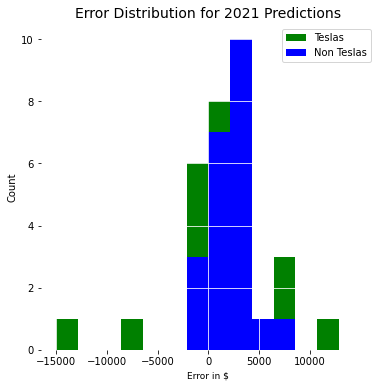

In [340]:
#plt.hist([error_tesla, Error], label=['x', 'y'])
#Error.hist()
bins = np.linspace(-15000, 15000, 15)
plt.figure(figsize=(6,6))

plt.hist(error_tesla, bins, label='Teslas', color= 'green')
plt.hist(Error, bins, label='Non Teslas', color='blue')


plt.legend(loc='upper right', fontsize=10)

plt.title('Error Distribution for 2021 Predictions', fontsize=14)

plt.xlabel('Error in $',fontsize=9)
plt.ylabel('Count',fontsize=10)
plt.yticks(fontsize=10)
#np.arange(-15000, 15000, step=3000)
plt.xticks( np.arange(-15000, 15000, step=5000), fontsize=10)
plt.box(on=None)
plt.grid(color='white')
plt.savefig("Error Distribution for 2021 Predictions double")

In [341]:
error_2021= pd.DataFrame(pd.Series(Error, name='2021 Error'))

error_2021.describe(percentiles= [0.05, .25, .5, .75, 0.94] )

,2021 Error
count,22
mean,"2,180"
std,"2,069"
min,"-1,753"
5%,-888
25%,"1,069"
50%,"2,202"
75%,"3,365"
94%,"4,922"
max,"7,467"


In [166]:
feature_names= X_tesla.columns
fx = pd.DataFrame(randf_opt3.feature_importances_, columns=['Mean Feature Importance'], index=feature_names)
pd.options.display.float_format = '{:.3f}'.format
fx.sort_values('Mean Feature Importance', ascending= False).head()

,Mean Feature Importance
smake,0.356
odometer,0.184
drive_fwd,0.087
age,0.065
Category_Cleaned_Pickup,0.060


In [172]:
should_buy = y_tesla_predict[y_tesla_predict>30000]
np.count_nonzero(should_buy)

4

### Next Steps
    * Redo this study with More MSRP data available
    * Two Step Algorithm- A lot of the algorithms likely to underestimate vehicles priced at over 35K. It might be good to first come up with a classifier that seperates that out and then see what model works